In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv('train_preds_custom.csv')
df['overest'] = False
df.loc[df['human_rating_mean']>df['human_rating.mean'],'overest'] = True
df['MSE'] = df['human_rating_mean']-df['human_rating.mean']
df['MSE1'] = np.abs(df['MSE'])

df = df.sort_values(['MSE1'],ascending=False)
df = df.reset_index(drop=True).reset_index()
df

,index,filename,type,class,human_rating.mean,human_rating.sem,expert_rating.mean,start,end,spread,human_rating_mean,overest,MSE,MSE1
0,0,fisheries_clusteredByEscapementTarget_GlimmerMDS,semantic,1,0.721538,0.017869,2.5,0.684737,0.758340,0.073602,0.309458,False,-0.412081,0.412081
1,1,fisheries_clusteredByHarvestRule_tSNE,abstract,2,0.752759,0.014806,5.0,0.723110,0.782408,0.059298,0.392116,False,-0.360642,0.360642
2,2,fisheries_clusteredByEscapementTarget_GlimmerMDS,semantic,4,0.632500,0.017696,3.5,0.595894,0.669106,0.073212,0.317920,False,-0.314580,0.314580
3,3,boston_GlimmerMDS,abstract,3,0.721333,0.024885,4.0,0.670438,0.772228,0.101790,0.428309,False,-0.293024,0.293024
4,4,grid6_4d_RobPCA,semantic,4,0.819167,0.024219,1.0,0.769066,0.869268,0.100202,0.531780,False,-0.287387,0.287387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,interleaved_100_500_3_25_cramped_rotated_PCA,abstract,2,0.768667,0.017576,4.5,0.732720,0.804613,0.071893,0.768041,False,-0.000626,0.000626
888,888,interleaved_100_500_3_25_cramped_rotated_PCA,abstract,1,0.584500,0.033887,4.5,0.515957,0.653043,0.137086,0.585088,True,0.000588,0.000588
889,889,n100-d5-c3-spr0.2-out0_PCA,semantic,1,0.500455,0.037778,3.0,0.424268,0.576641,0.152372,0.499935,False,-0.000520,0.000520
890,890,cars03Cropped_d3_PCA,semantic,2,0.437143,0.048511,2.0,0.339172,0.535113,0.195941,0.437590,True,0.000447,0.000447


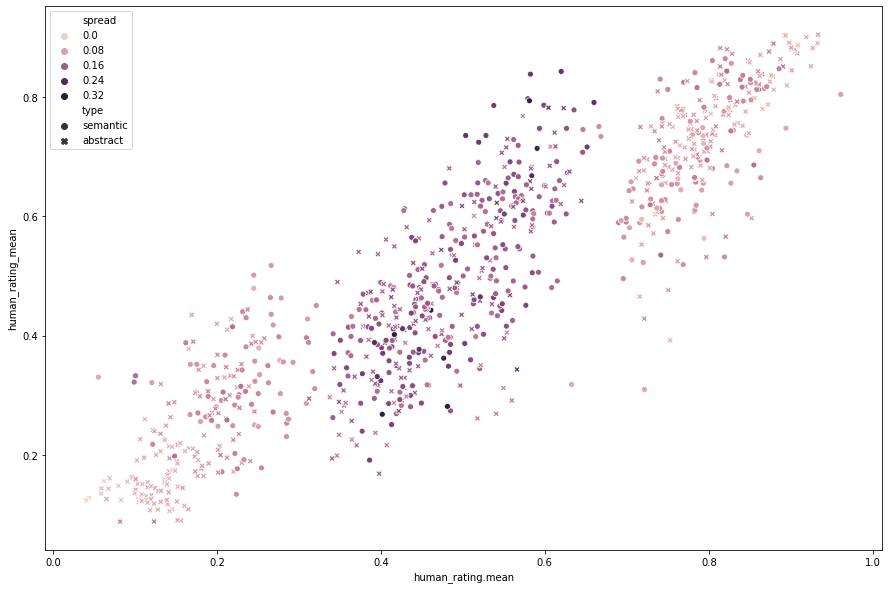

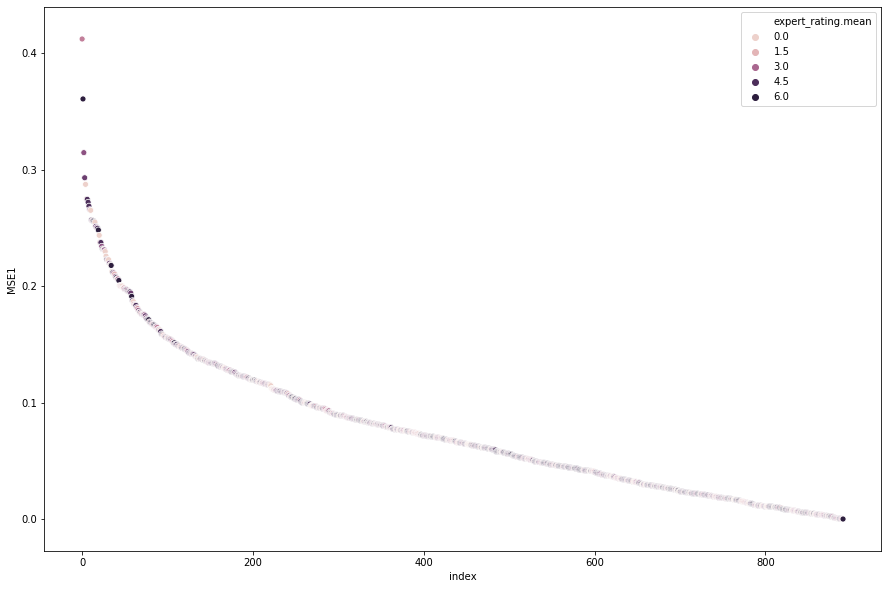

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='human_rating.mean',y='human_rating_mean',hue='spread', style="type",data=df,ax=ax)


fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='index',y='MSE1',hue='expert_rating.mean',data=df,ax=ax)

In [44]:
df[df['filename'].str.startswith('sw')]

,index,filename,type,class,human_rating.mean,human_rating.sem,expert_rating.mean,start,end,spread,human_rating_mean,overest,MSE,MSE1
5,5,swanson_GlimmerMDS,semantic,3,0.055455,0.016445,1.0,0.021255,0.089654,0.068399,0.330194,True,0.274739,0.274739
25,25,swanson_GlimmerMDS,semantic,1,0.100833,0.034688,1.0,0.029077,0.172590,0.143514,0.332488,True,0.231655,0.231655
31,31,swanson_GlimmerMDS,semantic,2,0.099167,0.033346,1.0,0.030186,0.168147,0.137961,0.321894,True,0.222727,0.222727
334,334,swanson_GlimmerMDS,abstract,3,0.044286,0.008811,1.0,0.026208,0.062364,0.036156,0.127500,True,0.083214,0.083214
336,336,swanson_GlimmerMDS,abstract,1,0.040714,0.007363,1.0,0.025607,0.055822,0.030215,0.123549,True,0.082834,0.082834
478,478,swanson_GlimmerMDS,abstract,2,0.065333,0.018193,1.0,0.028125,0.102542,0.074416,0.125692,True,0.060359,0.060359
